In [ ]:
# ライブラリの読み込み
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from pandas.plotting import scatter_matrix

In [ ]:
# データの読み込み
DATA = 'Desktop/data.csv'
df = pd.read_csv(DATA)

In [ ]:
print(df.head())

        age    fnlwgt  education-num  capital-gain  capital-loss  \
0  3.759317  1.182326      -1.201773     -0.147423     -0.217342   
1  0.540986 -1.097183       0.743122     -0.147423      3.447162   
2 -0.117309 -1.168326      -0.423815     -0.147423     -0.217342   
3  0.467842 -0.429370       1.521080     -0.147423     -0.217342   
4  0.102123  0.791181       0.743122     -0.147423     -0.217342   

   hours-per-week  workclass_?  workclass_Federal-gov  workclass_Local-gov  \
0       -0.033304            0                      0                    0   
1        1.185085            0                      0                    0   
2       -0.033304            0                      0                    0   
3       -0.033304            0                      0                    1   
4        0.129148            0                      0                    0   

   workclass_Never-worked  ...  native-country_Puerto-Rico  \
0                       0  ...                           0  

In [ ]:
# 各列にあるデータ数を確認
df.count()

age                                          16280
fnlwgt                                       16280
education-num                                16280
capital-gain                                 16280
capital-loss                                 16280
hours-per-week                               16280
workclass_?                                  16280
workclass_Federal-gov                        16280
workclass_Local-gov                          16280
workclass_Never-worked                       16280
workclass_Private                            16280
workclass_Self-emp-inc                       16280
workclass_Self-emp-not-inc                   16280
workclass_State-gov                          16280
workclass_Without-pay                        16280
education_10th                               16280
education_11th                               16280
education_12th                               16280
education_1st-4th                            16280
education_5th-6th              

In [ ]:
# 全てのデータを出力する 、1行だけ出力してみる
pd.set_option('display.max_rows',108)
print(df)

            age    fnlwgt  education-num  capital-gain  capital-loss  \
0      3.759317  1.182326      -1.201773     -0.147423     -0.217342   
1      0.540986 -1.097183       0.743122     -0.147423      3.447162   
2     -0.117309 -1.168326      -0.423815     -0.147423     -0.217342   
3      0.467842 -0.429370       1.521080     -0.147423     -0.217342   
4      0.102123  0.791181       0.743122     -0.147423     -0.217342   
...         ...       ...            ...           ...           ...   
16275  0.248411 -1.015991      -0.034836     -0.147423      3.257151   
16276  1.491857  0.316108      -0.423815     -0.147423     -0.217342   
16277  0.248411 -0.453357       0.354143     -0.147423     -0.217342   
16278 -1.433899 -0.674452      -0.034836     -0.147423     -0.217342   
16279 -0.775604  1.084011      -0.423815      0.257025     -0.217342   

       hours-per-week  workclass_?  workclass_Federal-gov  \
0           -0.033304            0                      0   
1            

In [ ]:
# 分類するクラスの種類と数を確認
df['Y'].value_counts()

1    12288
0     3992
Name: Y, dtype: int64

In [ ]:
# 機械学習のモデルを作成するトレーニング用と評価用の2種類に分割する
train_x = df.drop(['Y'],axis=1) #　説明変数のみにする
train_y = df['Y'] # 正解クラス
(train_x,test_x,train_y,test_y) = train_test_split(train_x,train_y,test_size = 0.3,random_state = 42)
# 訓練用の説明変数と正解クラス、評価用の説明変数と正解クラスに分割 

In [ ]:
# 識別モデルの構築
random_forest = RandomForestClassifier(max_depth=30, n_estimators=30, random_state=42)
random_forest.fit(train_x, train_y)

# 予測値算出
y_pred = random_forest.predict(test_x)

#モデルを作成する段階でのモデルの識別精度
trainaccuracy_random_forest = random_forest.score(train_x, train_y)
print('TrainAccuracy: {}'.format(trainaccuracy_random_forest))

#作成したモデルに学習に使用していない評価用のデータセットを入力し精度を確認
accuracy_random_forest = accuracy_score(test_y, y_pred)
print('Accuracy: {}'.format(accuracy_random_forest))

TrainAccuracy: 0.9849069849069849
Accuracy: 0.8546273546273546


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67      1182
           1       0.88      0.93      0.91      3702

    accuracy                           0.85      4884
   macro avg       0.81      0.77      0.79      4884
weighted avg       0.85      0.85      0.85      4884



Text(91.68, 0.5, 'true value')

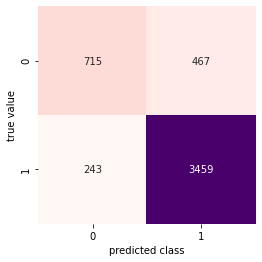

In [ ]:
#confusion matrix
mat = confusion_matrix(test_y, y_pred)
sns.heatmap(mat, square=True, annot=True, cbar=False, fmt='d', cmap='RdPu')
plt.xlabel('predicted class')
plt.ylabel('true value')

In [ ]:
#どのデータを、どのクラスに分類したのか。
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
# ランダムフォレストのパラメータの候補をいくつか決める
parameters = {
    'n_estimators' :[3,5,10,30,50],#作成する決定木の数
    'random_state' :[7,42],
    'max_depth' :[3,5,8,10],#決定木の深さ
    'min_samples_leaf': [2,5,10,20,50],#分岐し終わったノードの最小サンプル数
    'min_samples_split': [2,5,10,20,50]#決定木が分岐する際に必要なサンプル数
}

#グリッドサーチを使う
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters, cv=2)

#学習モデルを作成
clf.fit(train_x, train_y)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 8, 10],
                         'min_samples_leaf': [2, 5, 10, 20, 50],
                         'min_samples_split': [2, 5, 10, 20, 50],
                         'n_estimators': [3, 5, 10, 30, 50],
                         'random_state': [7, 42]})

In [ ]:
#精度を確認
best_clf = clf.best_estimator_ #ここにベストパラメータの組み合わせが入っています
print('score: {:.2%}'.format(best_clf.score(train_x, train_y)))
y_pred = clf.predict(test_x)
print('score: {:.2%}'.format(best_clf.score(test_x, test_y)))

score: 86.17%
score: 85.71%


## 特徴量の重要度

In [ ]:
# 変数の重要度を可視化
importance = pd.DataFrame({ '変数' :train_x.columns, '重要度' :random_forest.feature_importances_})
importance

,変数,重要度
0,age,0.136462
1,fnlwgt,0.116271
2,education-num,0.057808
3,capital-gain,0.090113
4,capital-loss,0.028578
5,hours-per-week,0.084749
6,workclass_?,0.002589
7,workclass_Federal-gov,0.005433
8,workclass_Local-gov,0.006249
9,workclass_Never-worked,0.000000


## 2つの特徴量をプロット

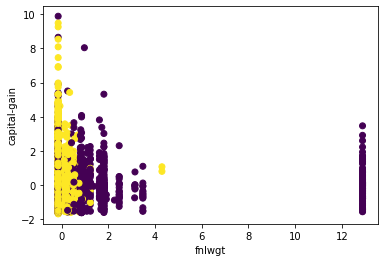

In [ ]:
plt.scatter(df['capital-gain'], df['fnlwgt'], c = df['Y'])
plt.ylabel('capital-gain')
plt.xlabel('fnlwgt')
plt.show()

In [ ]:
df_1 = df[df.Y == 0]
df_2 = df[df.Y == 1]

## 3次元グラフで可視化

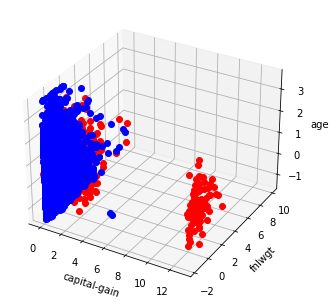

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel('capital-gain')
ax.set_ylabel('fnlwgt')
ax.set_zlabel('age')
ax.plot(df_1['capital-gain'], df_1['fnlwgt'],df_1['age'],marker="o",linestyle='None', c='red')
ax.plot(df_2['capital-gain'], df_2['fnlwgt'],df_2['age'],marker="o",linestyle='None', c='blue')
#ax.plot(df_3['capital-gain'], df_3['fnlwgt'],df_3['age'],marker="o",linestyle='None', c='green')

plt.show()

## 説明変数を絞ってモデルを学習

In [ ]:
clf.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 50,
 'n_estimators': 30,
 'random_state': 7}

In [ ]:
clf.best_score_

0.8534573534573535

In [ ]:
# 重要度の高い上位３つの特徴量だけを学習に用いる。
df_1 = pd.DataFrame({ 'capital-gain' :df['capital-gain'], 'fnlwgt' :df['fnlwgt'],'age' :df['age'],'Y' :df['Y']})
df_1

,capital-gain,fnlwgt,age,Y
0,-0.147423,1.182326,3.759317,1
1,-0.147423,-1.097183,0.540986,1
2,-0.147423,-1.168326,-0.117309,0
3,-0.147423,-0.429370,0.467842,1
4,-0.147423,0.791181,0.102123,0
...,...,...,...,...
16275,-0.147423,-1.015991,0.248411,1
16276,-0.147423,0.316108,1.491857,1
16277,-0.147423,-0.453357,0.248411,1
16278,-0.147423,-0.674452,-1.433899,1


In [ ]:
# 機械学習のモデルを作成するトレーニング用と評価用の2種類に分割する
train_X = df_1.drop(['Y'],axis=1) #　説明変数のみにする
train_Y = df_1['Y'] # 正解クラス
(train_X,test_X,train_Y,test_Y) = train_test_split(train_X,train_Y,test_size = 0.3,random_state = 42)
# 訓練用の説明変数と正解クラス、評価用の説明変数と正解クラスに分割 

In [ ]:
# 識別モデルの構築
random_forest_1 = RandomForestClassifier(max_depth=10, n_estimators=30, random_state=7)
random_forest_1.fit(train_X, train_Y)

# 予測値算出
Y_pred = random_forest_1.predict(test_X)

#モデルを作成する段階でのモデルの識別精度
trainaccuracy_random_forest = random_forest_1.score(train_X, train_Y)
print('TrainAccuracy: {}'.format(trainaccuracy_random_forest))

#作成したモデルに学習に使用していない評価用のデータセットを入力し精度を確認
accuracy_random_forest = accuracy_score(test_Y, Y_pred)
print('Accuracy: {}'.format(accuracy_random_forest))

TrainAccuracy: 0.805019305019305
Accuracy: 0.8093775593775594


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_Y, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.22      0.36      1182
           1       0.80      1.00      0.89      3702

    accuracy                           0.81      4884
   macro avg       0.89      0.61      0.62      4884
weighted avg       0.84      0.81      0.76      4884

